# Plots CYGNUS for various readout params

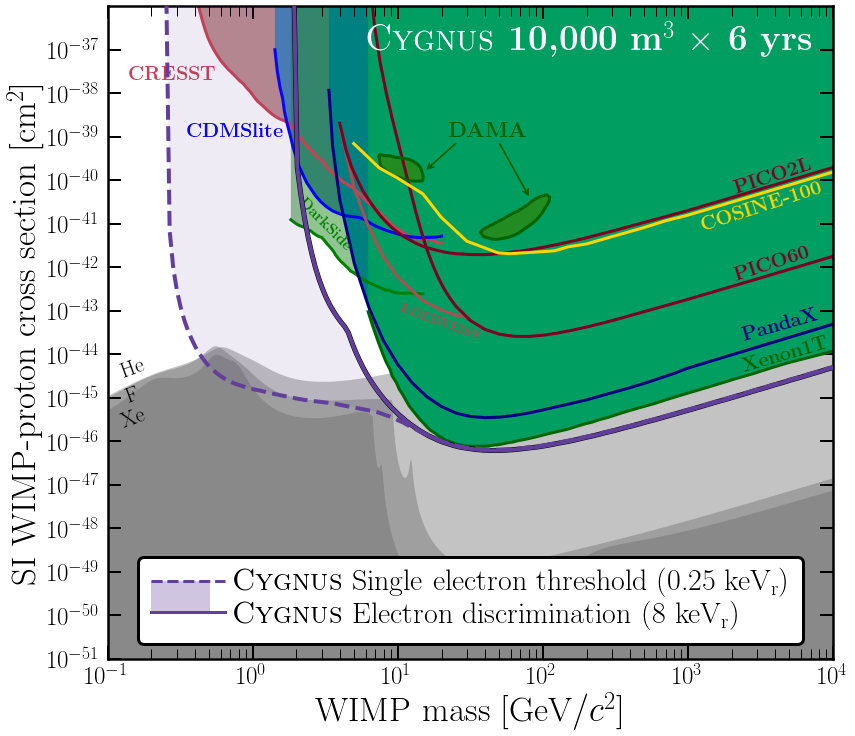

In [8]:
from numpy import *
from PlotFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean

fig,ax = MakeLimitPlot_SI(Annotations=True)
plt.text(0.12,3e-45,r"He",fontsize=22,rotation=20,color="k")
plt.text(0.13,8e-46,r"F",fontsize=22,rotation=20,color="k")
plt.text(0.12,2e-46,r"Xe",fontsize=22,rotation=20,color="k")

alphs = [0.1,0.2,0.3]
RS = 1.0
maxy = 1.0e-39
Vs = flipud(['10k'])
cols = cm.Purples(linspace(0.8,1.0,size(Vs)))
for i in range(0,size(Vs)):
    m,sig1 = getlimSI(Vs[i],"Predrift_250eV",RS,maxy)
    m,sig2 = getlimSI(Vs[i],"Predrift_8keV",RS,maxy)
    sig1[isnan(sig1)] = 1.0e-35
    sig2[isnan(sig2)] = 1.0e-35
    m1 = m[sig1>0]
    m2 = m[sig2>0]
    s1 = sig1[sig1>0]
    s2 = sig2[sig2>0]
    mm = append(m2,flipud(m1))
    ss = append(s2,flipud(s1))
    mm = append(mm,mm[0])
    ss = append(ss,ss[0])
    plt.fill_between(mm,ss/1.5,facecolor=cols[i,:],alpha=alphs[i],zorder=10)
    plt.plot(m2,s2/1.5,linestyle='-',color='k',linewidth=5,zorder=11)
    plt.plot(m1,s1/1.5,linestyle='--',color=cols[i,:],linewidth=4,zorder=11)
    plt.plot(m2,s2/1.5,linestyle='-',color=cols[i,:],linewidth=4,zorder=11)

#plt.gcf().text(0.75,0.31,r'{\bf '+Vs[0]+r' m}$^3$',fontsize=28,color=cols[0,:],rotation=17)
#plt.gcf().text(0.75,0.38,r'{\bf '+Vs[1]+r' m}$^3$',fontsize=28,color=cols[1,:],rotation=17)
plt.gcf().text(0.88,0.83,r'{\bf {\sc Cygnus} 10,000 m$^3$ $\times$ {\bf  6 yrs}',fontsize=35,color='w',horizontalalignment='right')


# hacked legend
plt.plot(m,-sig1,linestyle='--',color='w',linewidth=3,label=r'{\sc Cygnus} Single electron threshold (0.25 keV$_{\rm r}$)')
plt.plot(m,-sig2,linestyle='-',color='w',linewidth=3,label=r'{\sc Cygnus} Electron discrimination (8 keV$_{\rm r}$)')
leg1 = ax.legend(fontsize=30,frameon=True,loc="lower center",framealpha=1.0,ncol=1,columnspacing=0.5,labelspacing=0.1)
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")
x0 = 0.2
x1 = 0.55
yu = 6e-50
yl = 1.2e-50
sh = 0.09
plt.fill_between([x0,x1-sh/2.0],[yu,yu],y2=[yl,yl],color=cols[-1,:],alpha=alphs[-1],linewidth=0,zorder=100)
plt.plot([x0,x1+sh],[yu,yu],'--',lw=3,zorder=100,color=cols[-1,:])
plt.plot([x0,x1+sh],[yl,yl],'-',lw=3,zorder=100,color=cols[-1,:])






plt.show()
fig.savefig('../plots/CYGNUS_V_SI.pdf',bbox_inches='tight')





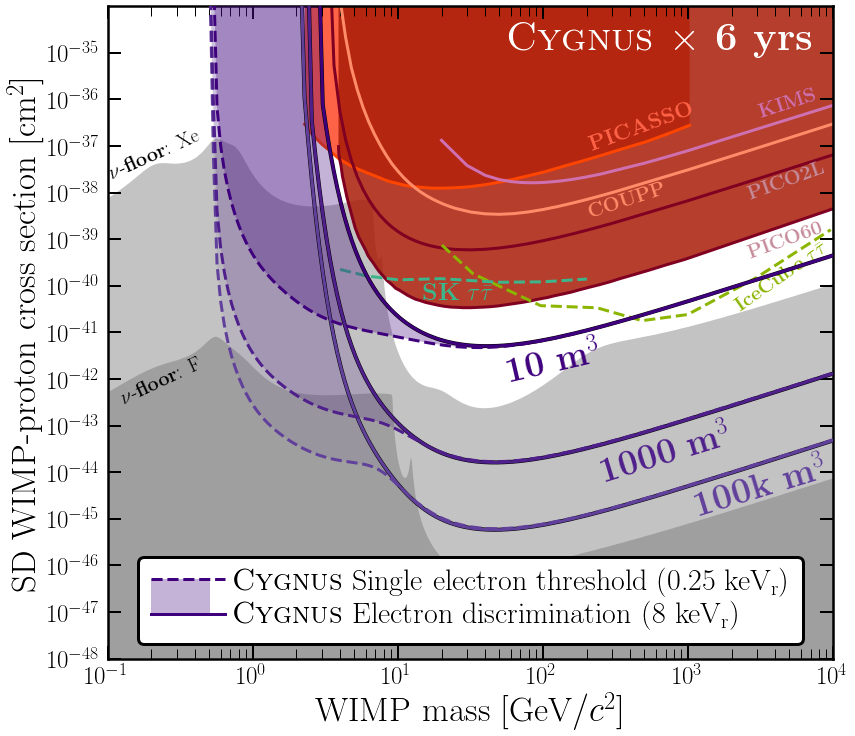

In [23]:
# Enhancement factor
A = 19
S_p = 0.478
J = 0.5
RS = 1.5*(4/3)*((J+1)/J)*(S_p)**2.0/A**2

fig,ax = MakeLimitPlot_SD(Annotations=True)
plt.text(0.1,2e-38,r"$\nu$-{\bf floor}: Xe",fontsize=20,rotation=24,color="k")
plt.text(0.12,0.3e-42,r"$\nu$-{\bf floor}: F",fontsize=20,rotation=25,color="k")

Vs = flipud(['10','1000','100k'])
cols = cm.Purples(linspace(0.8,1.0,size(Vs)))

maxy = 1.0e-31
for i in range(0,size(Vs)):
    m,sig1 = getlimSD(Vs[i],"Predrift_250eV",RS,maxy)
    m,sig2 = getlimSD(Vs[i],"Predrift_8keV",RS,maxy)
    sig1[isnan(sig1)] = 1.0e-33
    sig2[isnan(sig2)] = 1.0e-33
    m1 = m[sig1>0]
    m2 = m[sig2>0]
    s1 = sig1[sig1>0]
    s2 = sig2[sig2>0]
    mm = append(m2,flipud(m1))
    ss = append(s2,flipud(s1))
    mm = append(mm,mm[0])
    ss = append(ss,ss[0])
    plt.fill_between(mm,ss/1.5,facecolor=cols[i,:],alpha=alphs[i],zorder=10)
    plt.plot(m2,s2/1.5,linestyle='-',color='k',linewidth=4,zorder=11)
    plt.plot(m1,s1/1.5,linestyle='--',color=cols[i,:],linewidth=3,zorder=11)
    plt.plot(m2,s2/1.5,linestyle='-',color=cols[i,:],linewidth=3,zorder=11)

    
plt.gcf().text(0.75,0.29,r'{\bf '+Vs[0]+r' m}$^3$',fontsize=35,color=cols[0,:],rotation=17)
plt.gcf().text(0.65,0.33,r'{\bf '+Vs[1]+r' m}$^3$',fontsize=35,color=cols[1,:],rotation=17)
plt.gcf().text(0.55,0.445,r'{\bf '+Vs[2]+r' m}$^3$',fontsize=35,color=cols[2,:],rotation=13)
plt.gcf().text(0.88,0.83,r'{\bf {\sc Cygnus} $\times$ {\bf  6 yrs}',fontsize=40,color='w',horizontalalignment='right')

# hacked legend
plt.plot(m,-sig1,linestyle='--',color='w',linewidth=3,label=r'{\sc Cygnus} Single electron threshold (0.25 keV$_{\rm r}$)')
plt.plot(m,-sig2,linestyle='-',color='w',linewidth=3,label=r'{\sc Cygnus} Electron discrimination (8 keV$_{\rm r}$)')
leg1 = ax.legend(fontsize=30,frameon=True,loc="lower center",framealpha=1.0,ncol=1,columnspacing=0.5,labelspacing=0.1)
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")
x0 = 0.2
x1 = 0.55
yu = 5e-47
yl = 9e-48
sh = 0.09
plt.fill_between([x0,x1-sh/2.0],[yu,yu],y2=[yl,yl],color=cols[-1,:],alpha=alphs[-1],linewidth=0,zorder=100)
plt.plot([x0,x1+sh],[yu,yu],'--',lw=3,zorder=100,color=cols[-1,:])
plt.plot([x0,x1+sh],[yl,yl],'-',lw=3,zorder=100,color=cols[-1,:])


plt.show()
fig.savefig('../plots/CYGNUS_V_SD.pdf',bbox_inches='tight')


# Thresholds

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.



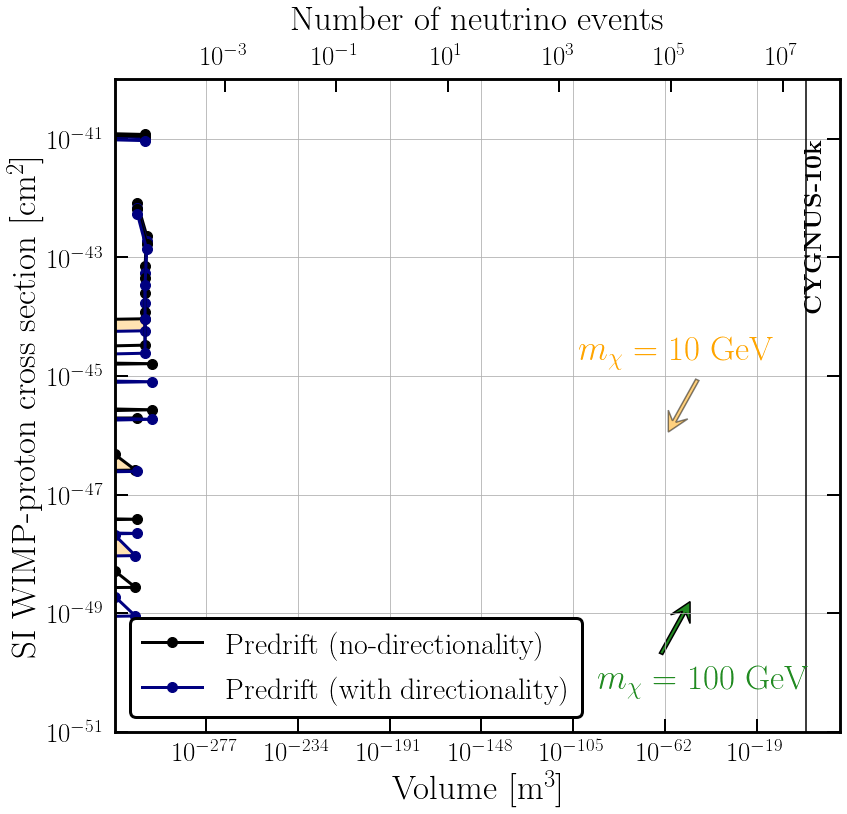

In [25]:
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=27)

fig, ax1 = plt.subplots()
fig.set_size_inches(13,12)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis


xmin = 0.001
xmax = 1.0e10
ymax = 1.0e-40
ymin = 1.0e-51

C1 = loadtxt("../data/CYGNUS-Exposure-Nondirectional.txt")
C2 = loadtxt("../data/CYGNUS-Exposure-Predrift.txt")


V = C2[0,:]
NB8_1 = C1[3,:]
NB8_2 = C2[3,:]

col1 = 'k'
col0 = 'crimson'
col2 = 'navy'

ax1.loglog(V,C1[1,:],'.-',linewidth=3,color=col1,markersize=20,label="Predrift (no-directionality)")
ax1.loglog(V,C2[1,:],'.-',linewidth=3,color=col2,markersize=20,label="Predrift (with directionality)")
ax1.fill_between(V,C1[1,:],y2=C2[1,:],color='Orange',alpha=0.3,edgecolor='none',zorder=-1)

ax1.loglog(V,C1[4,:],'.-',linewidth=3,color=col1,markersize=20)
ax1.loglog(V,C2[4,:],'.-',linewidth=3,color=col2,markersize=20)
# ax1.fill_between(V,C1[4,:],y2=C2[4,:],color='ForestGreen',alpha=0.3,edgecolor='none',zorder=-1)



# Legend
leg1 = ax1.legend(fontsize=30,frameon=True,loc="lower left",framealpha=1)
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")

# Vertical line
ax1.loglog([1e4,1e4],[ymin,ymax],'k-')
ax1.text(4000,1e-41,r'{\bf CYGNUS-10k}',fontsize=25,rotation=90,verticalalignment='top')


# Labels
ax2.set_xlabel(r"Number of neutrino events",fontsize=35,labelpad=15)
ax1.set_ylabel(r"SI WIMP-proton cross section [cm$^2$]",fontsize=35)
ax1.set_xlabel(r'Volume [m$^3$]',fontsize=35)  # we already handled the x-label with ax1
ax1.set_xlim([V[0],V[-1]])
ax2.set_xlim([NB8_2[0],NB8_2[-1]])


# Arrows
plt.gcf().text(0.62,0.55,r'$m_\chi = 10$ GeV',fontsize=35,color='Orange')
plt.gcf().text(0.64,0.17,r'$m_\chi = 100$ GeV',fontsize=35,color='ForestGreen')
ax1.arrow(0.75, 0.08, 0.04, 0.08, transform=ax.transAxes,
          length_includes_head=True,width=0.005,lw=1.5,
          head_width=0.03, head_length=0.03, overhang=0.4,
          edgecolor='k',facecolor='ForestGreen')
ax1.arrow(0.8, 0.5, -0.04, -0.08, transform=ax.transAxes,
          length_includes_head=True,width=0.005,lw=1.5,
          head_width=0.03, head_length=0.03, overhang=0.4,
          edgecolor='k',facecolor='Orange',alpha=0.5)

# Style
ax1.grid()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_ylim(bottom=ymin, top=ymax)
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=False,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=False)
ax2.tick_params(which='major',direction='in',width=2,length=13,bottom=False,top=True,pad=10)
ax2.tick_params(which='minor',direction='in',width=1,length=10,bottom=False,top=True)

plt.show()
fig.savefig('../plots/CYGNUS-indivMass.pdf',bbox_inches='tight')


In [26]:
V

array([-0.00000000e+000, -0.00000000e+000,  2.89720959e-306,
                    nan,  7.07331948e-310,  1.73833900e-305,
        2.89656230e-306,  2.89656230e-306,  2.89656230e-306,
        0.00000000e+000,  3.97385159e-303,  0.00000000e+000,
       -0.00000000e+000, -0.00000000e+000,  7.07331948e-310,
        0.00000000e+000,  0.00000000e+000,  2.05877155e-320,
        8.84164935e-311,  0.00000000e+000])

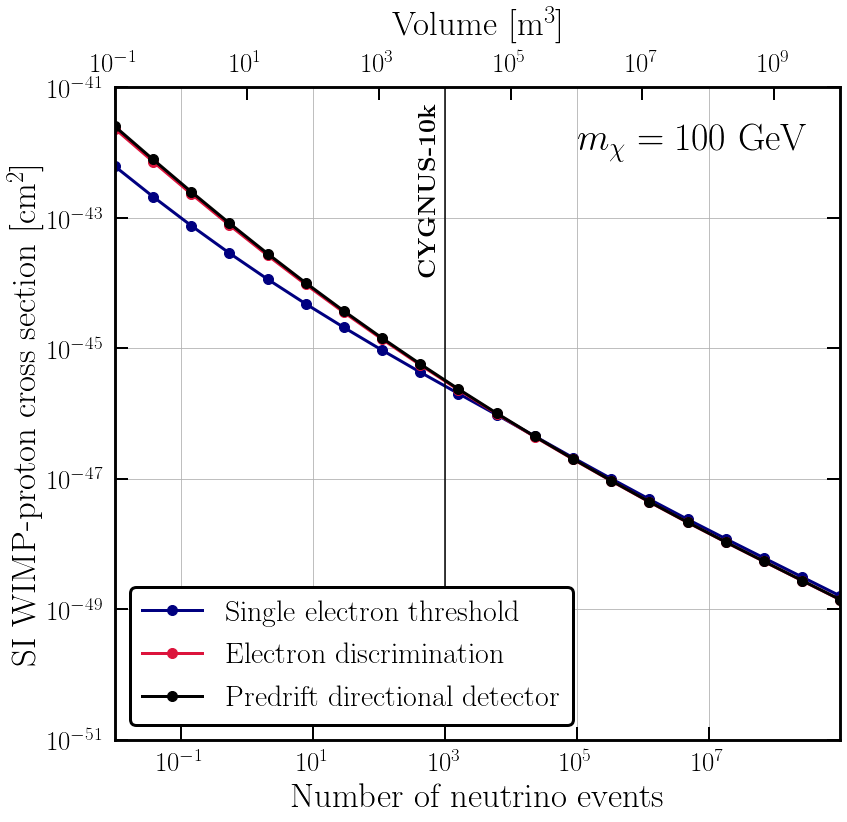

In [54]:
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=27)

fig, ax1 = plt.subplots()
fig.set_size_inches(13,12)

xmin = 0.001
xmax = 1.0e10
ymax = 1.0e-41
ymin = 1.0e-51

C1 = loadtxt("../data/CYGNUS10k-Exposure-1e.txt")
NB8 = C1[6,:]
V = C1[0,:]
ax1.loglog(NB8,C1[4,:]*1.1,'.-',linewidth=3,color='navy',markersize=20,label="Single electron threshold")

C1 = loadtxt("../data/CYGNUS10k-Exposure-edisc.txt")
ax1.loglog(NB8,C1[4,:],'.-',linewidth=3,color='crimson',markersize=20,label="Electron discrimination")

C1 = loadtxt("../data/CYGNUS10k-Exposure-predrift.txt")
ax1.loglog(NB8,C1[4,:],'.-',linewidth=3,color='k',markersize=20,label="Predrift directional detector")

# Labels
ax1.set_xlabel(r"Number of neutrino events",fontsize=35)
ax1.set_ylabel(r"SI WIMP-proton cross section [cm$^2$]",fontsize=35)
ax1.set_xlim([NB8[0],NB8[-1]])

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xlabel(r'Volume [m$^3$]',fontsize=35,labelpad=15)  # we already handled the x-label with ax1
ax2.set_xlim([V[0],V[-1]])
#ax2.loglog([1e3,1e3],[ymin,ymax],'k-')
ax2.loglog([1e4,1e4],[ymin,ymax],'k-')
#ax2.loglog([1e5,1e5],[ymin,ymax],'k-')
ax2.loglog(-NB8,C1[4,:],'.-',linewidth=3,color='navy',markersize=20,label="Single electron threshold")
ax2.loglog(-NB8,C1[4,:],'.-',linewidth=3,color='crimson',markersize=20,label="Electron discrimination")
ax2.loglog(-NB8,C1[4,:],'.-',linewidth=3,color='k',markersize=20,label="Predrift directional detector")
#ax2.text(400,3e-42,r'{\bf CYGNUS-1000}',fontsize=25,rotation=90)
ax2.text(4000,3e-42,r'{\bf CYGNUS-10k}',fontsize=25,rotation=90)
#ax2.text(40000,3e-42,r'{\bf CYGNUS-100k}',fontsize=25,rotation=90)

plt.gcf().text(0.62,0.8,r'$m_\chi = 100$ GeV',fontsize=38)

# Style
ax1.grid()
#ax2.grid()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_ylim(bottom=ymin, top=ymax)
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=False,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=False)
ax2.tick_params(which='major',direction='in',width=2,length=13,bottom=False,top=True,pad=10)
ax2.tick_params(which='minor',direction='in',width=1,length=10,bottom=False,top=True)
leg1 = ax2.legend(fontsize=30,frameon=True,loc="lower left",framealpha=1)
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")

plt.show()
fig.savefig('../plots/CYGNUS10k-100GeV.pdf',bbox_inches='tight')


In [114]:
pos1 = ax1.get_position()
print pos1
pos1.y1 *= 0.9

Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)


In [107]:
pos.height *= 0.9

0.755